In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# 1. Data Preparation:

In [2]:
#df = pd.read_excel('C:\ExcelR\DS\Assignment\Decision Tree\Decision Tree\heart_disease.xlsx')
df= pd.read_csv("C:\ExcelR\DS\Assignment\Decision Tree\Decision Tree\heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# 2. Exploratory Data Analysis (EDA):

In [4]:
df.duplicated().sum()

723

In [5]:
df= df.drop_duplicates()

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Figure size 720x432 with 0 Axes>

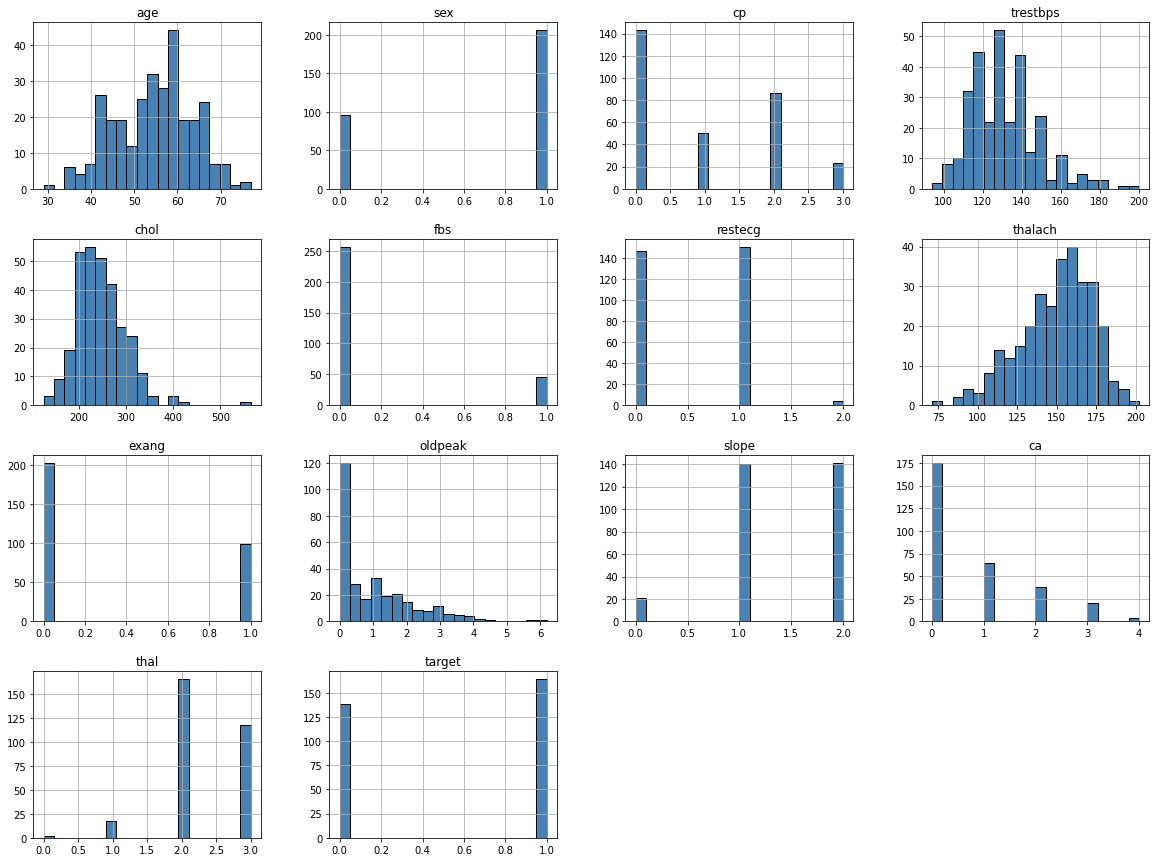

In [8]:
plt.figure(figsize=(10, 6))
df.hist(bins=20, figsize=(20, 15), color='steelblue', edgecolor='black')
plt.show()

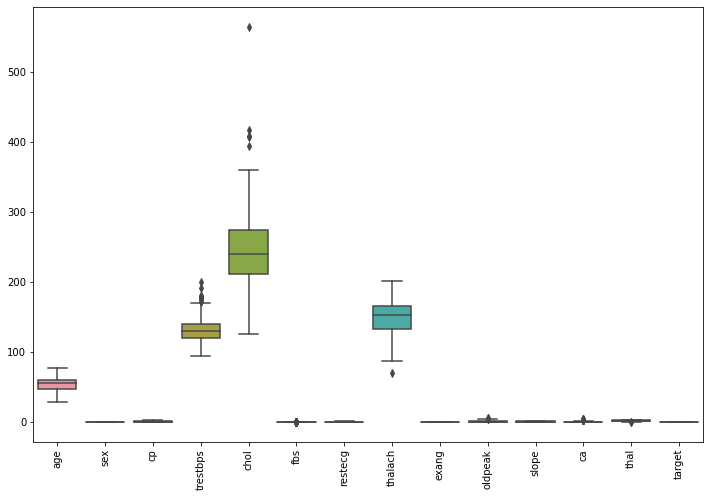

In [9]:
# Boxplot to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


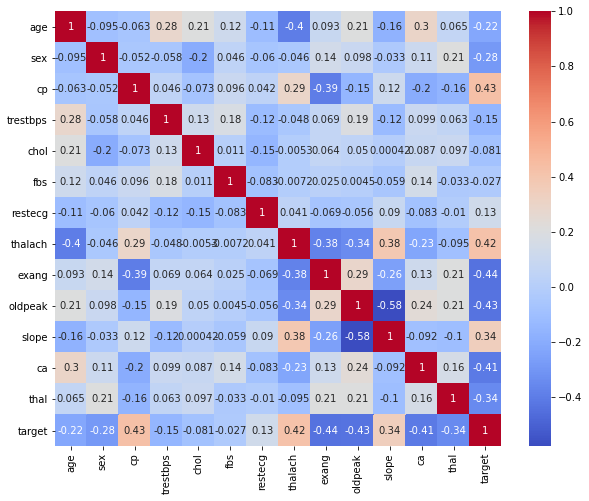

In [10]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# 3. feature Engineering

In [11]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [12]:
outlier_detection(df,df.columns)

<ipython-input-11-9629c4a7adf9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))
<ipython-input-11-9629c4a7adf9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))
<ipython-input-11-9629c4a7adf9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [13]:
data = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)


In [14]:

# Feature scaling
scaler = StandardScaler()
features = data.drop('target', axis=1)
features_scaled = scaler.fit_transform(features)
target = data['target']

In [15]:
features_scaled

array([[-0.26796589,  0.68265615, -0.37751145, ..., -0.25175441,
        -1.09744228,  1.25745639],
       [-0.15726042,  0.68265615,  0.52731759, ..., -0.25175441,
        -1.09744228,  1.25745639],
       [ 1.72473259,  0.68265615,  0.82892727, ..., -0.25175441,
        -1.09744228,  1.25745639],
       ...,
       [-0.26796589,  0.68265615, -0.19654565, ..., -0.25175441,
        -1.09744228,  1.25745639],
       [ 0.50697241,  0.68265615,  1.73375631, ..., -0.25175441,
         0.91120965, -0.79525621],
       [-0.04655495,  0.68265615, -0.67912113, ..., -0.25175441,
        -1.09744228,  1.25745639]])

In [16]:
features

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,cp_2.0,cp_3.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,thal_1.0,thal_2.0,thal_3.0
0,52.0,1.0,125.0,212.0,0.0,168.0,0.0,1.0,2.0,0,0,0,1,0,0,1,0,0,1
1,53.0,1.0,140.0,203.0,0.0,155.0,1.0,3.1,0.0,0,0,0,0,0,0,0,0,0,1
2,70.0,1.0,145.0,174.0,0.0,125.0,1.0,2.6,0.0,0,0,0,1,0,0,0,0,0,1
3,61.0,1.0,148.0,203.0,0.0,161.0,0.0,0.0,1.0,0,0,0,1,0,0,1,0,0,1
4,62.0,0.0,138.0,294.0,0.0,106.0,0.0,1.9,2.5,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68.0,0.0,120.0,211.0,0.0,115.0,0.0,1.5,0.0,0,1,0,0,0,1,0,0,1,0
733,44.0,0.0,108.0,141.0,0.0,175.0,0.0,0.6,0.0,0,1,0,1,0,1,0,0,1,0
739,52.0,1.0,128.0,255.0,0.0,161.0,1.0,0.0,1.0,0,0,0,1,0,0,1,0,0,1
843,59.0,1.0,160.0,273.0,0.0,125.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,1,0


# `4. Decision Tree Classification:

In [17]:
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [18]:
x_test

array([[-1.15360966,  0.68265615, -0.07590177, ..., -0.25175441,
         0.91120965, -0.79525621],
       [ 0.83908882, -1.46486632, -0.07590177, ..., -0.25175441,
        -1.09744228,  1.25745639],
       [ 0.39626693, -1.46486632,  2.33697567, ...,  3.9721251 ,
        -1.09744228, -0.79525621],
       ...,
       [-0.26796589,  0.68265615, -0.19654565, ..., -0.25175441,
        -1.09744228,  1.25745639],
       [ 1.2819107 ,  0.68265615,  1.73375631, ...,  3.9721251 ,
        -1.09744228, -0.79525621],
       [-2.1499589 , -1.46486632,  0.40667371, ..., -0.25175441,
         0.91120965, -0.79525621]])

In [19]:
x_train

array([[-0.71078778,  0.68265615, -0.43783339, ..., -0.25175441,
        -1.09744228,  1.25745639],
       [ 0.39626693,  0.68265615, -0.19654565, ..., -0.25175441,
        -1.09744228,  1.25745639],
       [-1.04290419, -1.46486632, -0.07590177, ..., -0.25175441,
         0.91120965, -0.79525621],
       ...,
       [ 0.61767788, -1.46486632,  1.13053695, ..., -0.25175441,
         0.91120965, -0.79525621],
       [ 1.39261617, -1.46486632,  1.25118082, ..., -0.25175441,
         0.91120965, -0.79525621],
       [-1.3750206 ,  0.68265615, -0.67912113, ..., -0.25175441,
         0.91120965, -0.79525621]])

In [20]:
y_test

245    1.0
349    0.0
135    0.0
389    1.0
66     1.0
      ... 
402    1.0
123    1.0
739    0.0
274    1.0
256    1.0
Name: target, Length: 61, dtype: float64

In [21]:
y_train

163    0.0
291    0.0
280    1.0
85     1.0
239    0.0
      ... 
267    0.0
77     0.0
125    1.0
522    1.0
119    1.0
Name: target, Length: 241, dtype: float64

In [22]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
y_pred = dt_model.predict(x_test)

In [24]:
y_pred


array([1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1.])

In [25]:
accuracy_score(y_test,y_pred)


0.7377049180327869

In [26]:
precision_score(y_test,y_pred)

0.6666666666666666

In [27]:
recall_score(y_test,y_pred)

0.896551724137931

In [28]:
f1_score(y_test,y_pred)

0.7647058823529411

In [29]:
roc_auc_score(y_test,y_pred)

0.7451508620689655

# 5. Hyperparameter Tuning:

In [30]:
dt_model=DecisionTreeClassifier(max_depth=5, min_samples_split=4, criterion='gini')
dt_model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=4)

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 4, 6]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)


{'max_depth': 3, 'min_samples_split': 2}


# 6. Model Evaluation and Analysis:

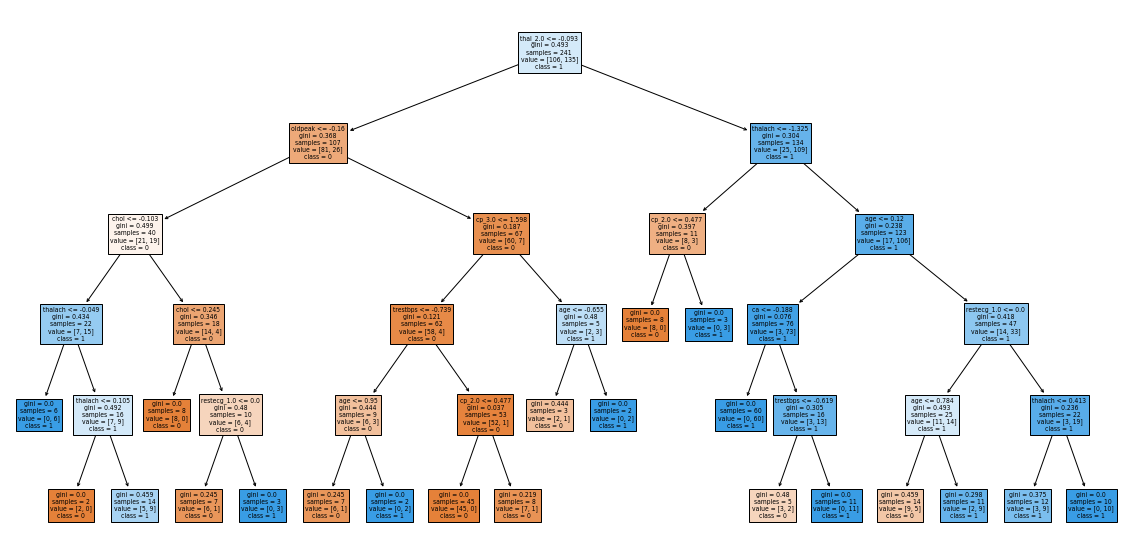

In [33]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=features.columns, class_names=['0', '1'])
plt.show()

In [34]:
feature_importances = dt_model.feature_importances_
features = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
print(features.sort_values(by='Importance', ascending=False))

        Feature  Importance
17     thal_2.0    0.434005
5       thalach    0.121124
0           age    0.110400
7       oldpeak    0.077087
3          chol    0.062822
12  restecg_1.0    0.058774
10       cp_2.0    0.051292
2      trestbps    0.044798
11       cp_3.0    0.029743
8            ca    0.009955
14    slope_1.0    0.000000
16     thal_1.0    0.000000
15    slope_2.0    0.000000
9        cp_1.0    0.000000
13  restecg_2.0    0.000000
1           sex    0.000000
6         exang    0.000000
4           fbs    0.000000
18     thal_3.0    0.000000


1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

max_depth:

Controls the maximum depth of the tree.
Effect: A deeper tree captures more detail but can lead to overfitting.
    A shallow tree might underfit, missing out on important patterns.
    
min_samples_split:

The minimum number of samples required to split an internal node.
Effect: Higher values prevent overfitting by ensuring that nodes have a sufficient number of samples before splitting.
    Lower values can lead to overfitting as the model tries to capture all patterns, including noise.
    
min_samples_leaf:

The minimum number of samples required to be at a leaf node.
Effect: Similar to min_samples_split, but applies to leaf nodes.
    Higher values enforce smoothing, preventing overfitting by ensuring a certain number of samples are needed for a node to be considered a leaf.

criterion:

Measures the quality of a split. Common options are gini (Gini Impurity) and entropy (Information Gain).
Effect: Gini tends to be slightly faster, while entropy is more accurate in some cases, depending on the data distribution.

max_features:

The number of features to consider when looking for the best split.
Effect: Lower values reduce complexity and can prevent overfitting but may result in underfitting if important features are not considered in splits.

max_leaf_nodes:

Limits the number of leaf nodes in the tree.
Effect: Reduces complexity and overfitting by limiting the number of leaves.

splitter:

The strategy used to choose the split at each node. Can be best (chooses the best split) or random (chooses the best random split).
Effect: Using random can introduce randomness and make the model less prone to overfitting, at the cost of potentially lower accuracy.

2. What is the difference between the Label encoding and One-hot encoding?
Label Encoding:

Converts categorical variables into numeric labels by assigning a unique integer to each category.
When to Use: When the categorical variable has an intrinsic order (e.g., low, medium, high).
Categories ['apple', 'banana', 'orange'] would be encoded as [0, 1, 2].
Drawback: For non-ordinal categories, the algorithm may misinterpret the numerical values as having some order, which can negatively affect performance.
    
One-Hot Encoding:

Converts each category into separate binary columns (0 or 1) representing the presence of the category.
When to Use: When the categorical variable has no intrinsic order (e.g., colors, cities).
Categories ['apple', 'banana', 'orange'] would result in columns like [is_banana, is_orange].
Advantage: Avoids the false sense of order that Label Encoding might introduce, making it more suitable for unordered categorical variables.